<a href="https://colab.research.google.com/github/sagar-rathod/PytorchDeepML/blob/master/examples/Road_Segmentation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the library

In [ ]:
!pip install deepml

In [ ]:
!pip install --upgrade --force-reinstall --no-deps albumentations==1.0.3

     |████████████████████████████████| 98 kB 6.4 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-2njgzrlc
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-2njgzrlc
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 376 kB 36.0 MB/s 
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.2.0-py3-none-any.whl size=88601 sha256=4dffcf80ab7167e72ce843816f812c8f7e62261b62aa04fc92570ad87e82dcf0
  Stored in directory: /tmp/pip-ephem-wheel-cache-8lat9_43/wheels/fa/c5/a8/1e8af6cb04a0974db8a4a156ebd2fdd1d99ad2558d3fce49d4
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=fec66999b5a75ab9f6c1673a39e602710a3983159a2e4ed418b97263631b5e16
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-n

In [ ]:
!pip install monai

     |████████████████████████████████| 650 kB 16.0 MB/s 


# Download the dataset 


### Mapping Challenge on Aicrowd

We will work on this [challenge](https://www.aicrowd.com/challenges/epfl-ml-road-segmentation) dataset for road segmentation.

Install aicrowd-cli tool

In [ ]:
!pip install -U aicrowd-cli==0.1.10
%load_ext aicrowd.magic

     |████████████████████████████████| 44 kB 2.6 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 170 kB 77.4 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 212 kB 57.9 MB/s 
     |████████████████████████████████| 1.1 MB 53.5 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 51 kB 9.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you hav

In [ ]:
!aicrowd login

Please login here: https://api.aicrowd.com/auth/Q1eiFKTYJJc9aPO93c3YfzJTtn2B-_-Zt-As8LXwUUw
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://api.aicrowd.com/auth/Q1eiFKTYJJc9aPO93c3YfzJTtn2B-_-Zt-As8LXwUUw'
API Key valid
Saved API Key successfully!


In [ ]:
!rm -r data
!mkdir data
%aicrowd ds dl -c epfl-ml-road-segmentation -o data

rm: cannot remove 'data': No such file or directory


79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation.zip:   0%|          | 0.00/73.6M [00:00<?, ?B/s]

In [ ]:
# Extract dataset
!unzip data/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation.zip

Archive:  data/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation.zip
  inflating: submission_to_mask.py   
  inflating: mask_to_submission.py   
  inflating: training.zip            
  inflating: sample_submission.csv   
  inflating: test_set_images.zip     


In [ ]:
!unzip training.zip
!unzip test_set_images.zip
!rm *.zip

In [ ]:
from matplotlib import pyplot as plt
import os
from PIL import Image
import numpy as np

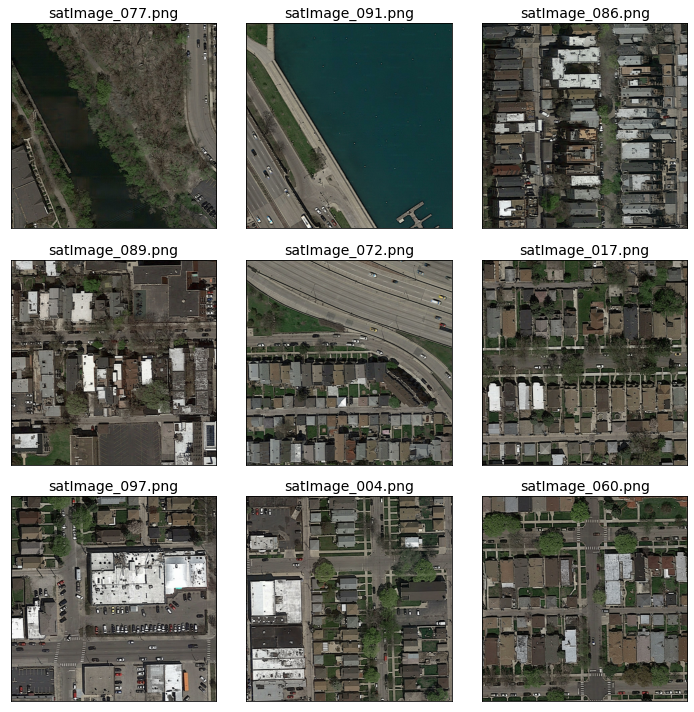

In [ ]:
from deepml.visualize import show_images_from_folder

# Check some random samples of images from train set
show_images_from_folder("./training/images/")

In [ ]:
training_images = os.listdir("./training/images")
len(training_images)

100

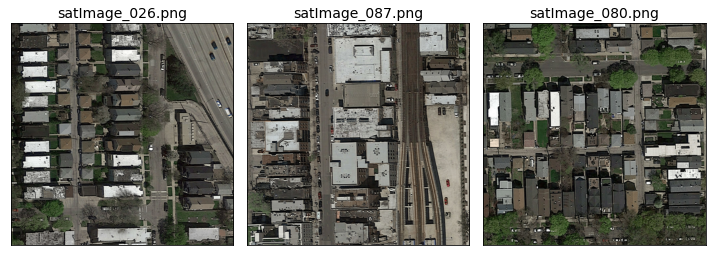

In [ ]:
from deepml.visualize import show_images_from_folder

#Check specific images
show_images_from_folder(img_dir="./training/images", images=training_images[:3])

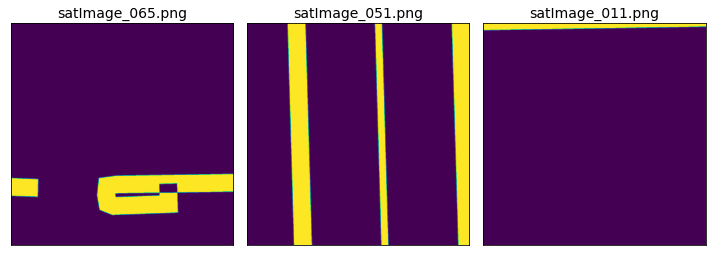

In [ ]:
masks_images = os.listdir("./training/groundtruth")
show_images_from_folder(img_dir="./training/groundtruth", images=masks_images[:3])

In [ ]:
#Total Images 
len(os.listdir("./training/images/"))

100

Check input Image size:

In [ ]:
np.array(Image.open(f"./training/images/{training_images[0]}")).shape

(400, 400, 3)

# Create Image Chips of Size (256, 256)

Since original images sizes are of size (400, 400), we can create image chips of size (256, 256)

In [ ]:
from deepml.geospatial.utils import create_chips
from tqdm.auto import tqdm

In [ ]:
original_image_size = 400
chip_size = 256
stride = original_image_size - chip_size

for file in tqdm(training_images):
    train_image = os.path.join("./training/images", file)
    mask_image = os.path.join("./training/groundtruth", file)

    create_chips(train_image, mask_image, "./chips", stride=stride, 
                 window_size=chip_size, geo_tagged=False)

  0%|          | 0/100 [00:00<?, ?it/s]

Processing:
Image file: ./training/images/satImage_026.png
Label file: ./training/groundtruth/satImage_026.png
Shape of training data  is: (3, 400, 400)
Shape of label is: (400, 400)
Saved 4 images.
Processed!
Processing:
Image file: ./training/images/satImage_087.png
Label file: ./training/groundtruth/satImage_087.png
Shape of training data  is: (3, 400, 400)
Shape of label is: (400, 400)
Saved 4 images.
Processed!
Processing:
Image file: ./training/images/satImage_080.png
Label file: ./training/groundtruth/satImage_080.png
Shape of training data  is: (3, 400, 400)
Shape of label is: (400, 400)
Saved 4 images.
Processed!
Processing:
Image file: ./training/images/satImage_059.png
Label file: ./training/groundtruth/satImage_059.png
Shape of training data  is: (3, 400, 400)
Shape of label is: (400, 400)
Saved 4 images.
Processed!
Processing:
Image file: ./training/images/satImage_008.png
Label file: ./training/groundtruth/satImage_008.png
Shape of training data  is: (3, 400, 400)
Shape o

In [ ]:
images = os.listdir("./chips/images")
labels = os.listdir("./chips/labels")

print(len(images), len(labels))

400 400


Check taget labels values:

In [ ]:
np.unique(np.array(Image.open(os.path.join("./chips/labels", labels[0]))))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  51,  52,  53,
        54,  55,  56,  59,  60,  61,  62,  63,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  83,
        84,  85,  86,  87,  88,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       128, 129, 131, 132, 133, 135, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 173, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 19

Keep in mind, here we want to perform segmentation for 2 classes (non-road class - [0] and road class - [1]), so during preprocessing we will need to preprocess target label.

# Import Necessary packages

In [ ]:
import os
import torch
import torchvision
import pandas as pd
import numpy as np

In [ ]:
data_df = pd.DataFrame(data={"image": images})
data_df.head()

image
0  satImage_002_3.png
1  satImage_063_0.png
2  satImage_051_3.png
3  satImage_100_2.png
4  satImage_093_1.png

## Create Train & Val Set 

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data_df, random_state=49, train_size=0.95)
train_df.shape, val_df.shape

((380, 1), (20, 1))

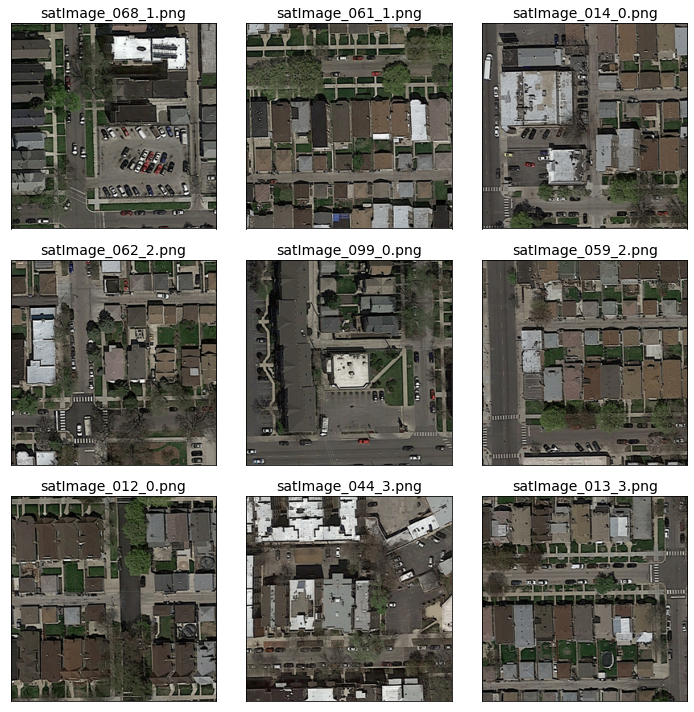

In [ ]:
from deepml.visualize import show_images_from_dataframe

show_images_from_dataframe(train_df.iloc[:9], img_dir="./chips/images", label_column="image")

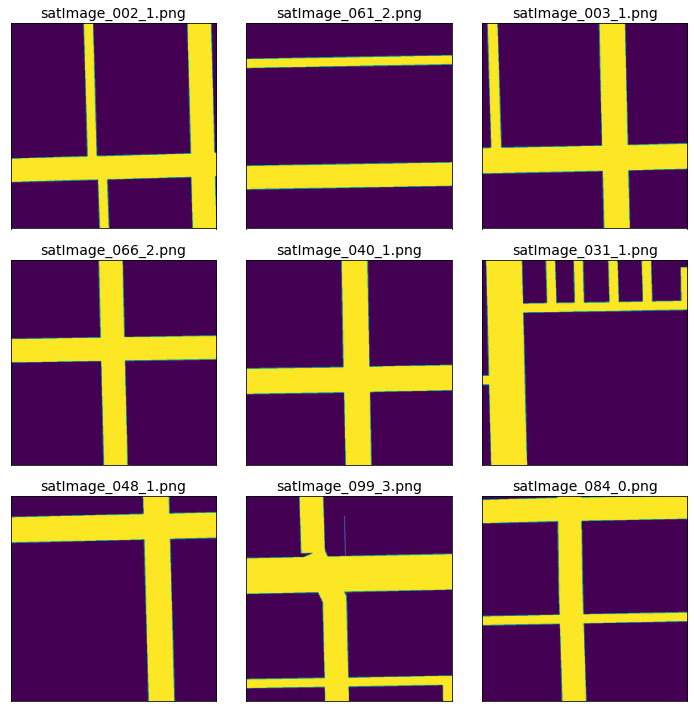

In [ ]:
show_images_from_dataframe(train_df.iloc[:9], img_dir="./chips/labels", label_column="image")

## Define data augmentation and torch transforms for train/val dataset

In [ ]:
from deepml import constants
import albumentations as aug
from albumentations.pytorch.transforms import ToTensorV2

train_transforms = aug.Compose([ 
                                 aug.HorizontalFlip(p=0.5),
                                 aug.VerticalFlip(p=0.5),
                                 aug.RandomRotate90(p=0.5),
                                 aug.ShiftScaleRotate(p=0.5),
                                 aug.Normalize(mean=constants.IMAGENET_MEAN, std=constants.IMAGENET_STD),
                                 ToTensorV2(transpose_mask=False),
                                  ])

val_transforms = aug.Compose([
                              aug.Normalize(mean=constants.IMAGENET_MEAN, std=constants.IMAGENET_STD),
                              ToTensorV2(transpose_mask=False),
                            ])


## Preprocessing for target labels, applied after data augmentation.
**Note**: We are going to use softmax activation, hence we will also need to add MulticlassSegmentationTargetTransform 

In [ ]:
from deepml.transforms import MulticlassSegmentationTargetTransform

class PreprocessTargetMask:

    def __call__(self, target_mask):
        target_mask[target_mask > 0] = 1
        return target_mask


target_transform = torchvision.transforms.Compose([
                                PreprocessTargetMask(),
                                MulticlassSegmentationTargetTransform(num_classes=2)
])

## Create Torch dataset

Since input is in dataframe, we need to use SegmentationDataFrameDataset

In [ ]:
from deepml.datasets import SegmentationDataFrameDataset


train_dataset = SegmentationDataFrameDataset(train_df, image_dir="./chips/images/", mask_dir="./chips/labels/",
                                             image_col = 'image', mask_col="image", albu_torch_transforms=train_transforms, target_transform=target_transform)

val_dataset = SegmentationDataFrameDataset(val_df, image_dir="./chips/images/", mask_dir="./chips/labels/",
                                             image_col = 'image', mask_col="image", albu_torch_transforms=val_transforms, target_transform=target_transform)


## Define Train and Val data loaders

In [ ]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

## Check tensor shape of sample validation batch

In [ ]:
for x,y in val_loader:
    print(x.shape, y.shape)
    break

torch.Size([16, 3, 256, 256]) torch.Size([16, 2, 256, 256])


## Create Model directory, to save model weights during training

In [ ]:
model_dir = "unet"
os.makedirs(model_dir, exist_ok=True)

## Select model architecture and define segmentation task

We wil use pretrained vgg19 as backbone architecture for Unet

In [ ]:
import segmentation_models_pytorch as smp
num_classes = 2
unet = smp.UnetPlusPlus(encoder_name="vgg19_bn", encoder_weights="imagenet", 
                        classes=num_classes)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
from deepml.tasks import Segmentation

segmenatation_task = Segmentation(unet, model_dir=model_dir, load_saved_model=False,  num_classes=2)

## Select loss function and optimizer

In [ ]:
import monai

criterion = monai.losses.DiceFocalLoss(softmax=True, batch=True,  jaccard=True)

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

model = unet

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# lr scheduler
lr_scheduler = ReduceLROnPlateau(optimizer, patience=4)

 ### Define Metrics to track

In [ ]:
metrics = [
    ( "iou", smp.utils.metrics.IoU(activation="softmax")),
    ( "fscore", smp.utils.metrics.Fscore(activation="softmax")),
    ( "acc", smp.utils.metrics.Accuracy(activation="softmax")),
    ("recall", smp.utils.metrics.Recall(activation="softmax")),
    ("precision", smp.utils.metrics.Precision(activation="softmax")),
]

## deepml.train.Learner class for Training

In [ ]:
from deepml.train import Learner

learner = Learner(segmenatation_task, optimizer, criterion)

Sanity check: Before actual training, check validation loss

In [ ]:
learner.validate(val_loader, criterion, metrics=metrics)

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/segmentation_models_pytorch/base/modules.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


OrderedDict([('loss', 0.8801482021808624),
             ('iou', 0.222021646797657),
             ('fscore', 0.36327919363975525),
             ('acc', 0.3632798194885254),
             ('recall', 0.363278865814209),
             ('precision', 0.3632795363664627)])

In [ ]:
from deepml.transforms import ImageNetInverseTransform
epochs = 25
learner.fit(train_loader, val_loader, epochs=epochs, lr_scheduler=lr_scheduler,  
            image_inverse_transform=ImageNetInverseTransform(), metrics=metrics)

Epoch 1/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/segmentation_models_pytorch/base/modules.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.6902 Validation Loss: 0.5657 [Saving best validation model]
Epoch 2/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.4550 Validation Loss: 0.4169 [Saving best validation model]
Epoch 3/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.3658 Validation Loss: 0.3548 [Saving best validation model]
Epoch 4/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.3177 Validation Loss: 0.3299 [Saving best validation model]
Epoch 5/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.3006 Validation Loss: 0.2941 [Saving best validation model]
Epoch 6/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.2731 Validation Loss: 0.2824 [Saving best validation model]
Epoch 7/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.2514 Validation Loss: 0.2585 [Saving best validation model]
Epoch 8/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.2428 Validation Loss: 0.2571 [Saving best validation model]
Epoch 9/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.2285 Validation Loss: 0.2404 [Saving best validation model]
Epoch 10/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.2217 Validation Loss: 0.2344 [Saving best validation model]
Epoch 11/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.2172 Validation Loss: 0.2487 
Epoch 12/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.2095 Validation Loss: 0.2214 [Saving best validation model]
Epoch 13/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.2042 Validation Loss: 0.2130 [Saving best validation model]
Epoch 14/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1983 Validation Loss: 0.2172 
Epoch 15/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1897 Validation Loss: 0.1998 [Saving best validation model]
Epoch 16/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1832 Validation Loss: 0.2030 
Epoch 17/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1828 Validation Loss: 0.1891 [Saving best validation model]
Epoch 18/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1754 Validation Loss: 0.1856 [Saving best validation model]
Epoch 19/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1844 Validation Loss: 0.1902 
Epoch 20/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1739 Validation Loss: 0.1812 [Saving best validation model]
Epoch 21/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1663 Validation Loss: 0.1821 
Epoch 22/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1649 Validation Loss: 0.1797 [Saving best validation model]
Epoch 23/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1607 Validation Loss: 0.1713 [Saving best validation model]
Epoch 24/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1634 Validation Loss: 0.1862 
Epoch 25/25:


Training    :   0%|          | 0/24 [00:00<?, ?it/s]

Validation  :   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 0.1600 Validation Loss: 0.1746 


## Train for more epochs, if required, calling again *fit* function, 

In [ ]:
# learner.fit(train_loader, val_loader, epochs=epochs, lr_scheduler=lr_scheduler, image_inverse_transform=ImageNetInverseTransform(),
#             steps_per_epoch=2, metrics=metrics)

Save model weights, explicitly

In [ ]:
learner.save("epoch_1_weights.pt", save_optimizer_state=True)

'unet/epoch_1_weights.pt'

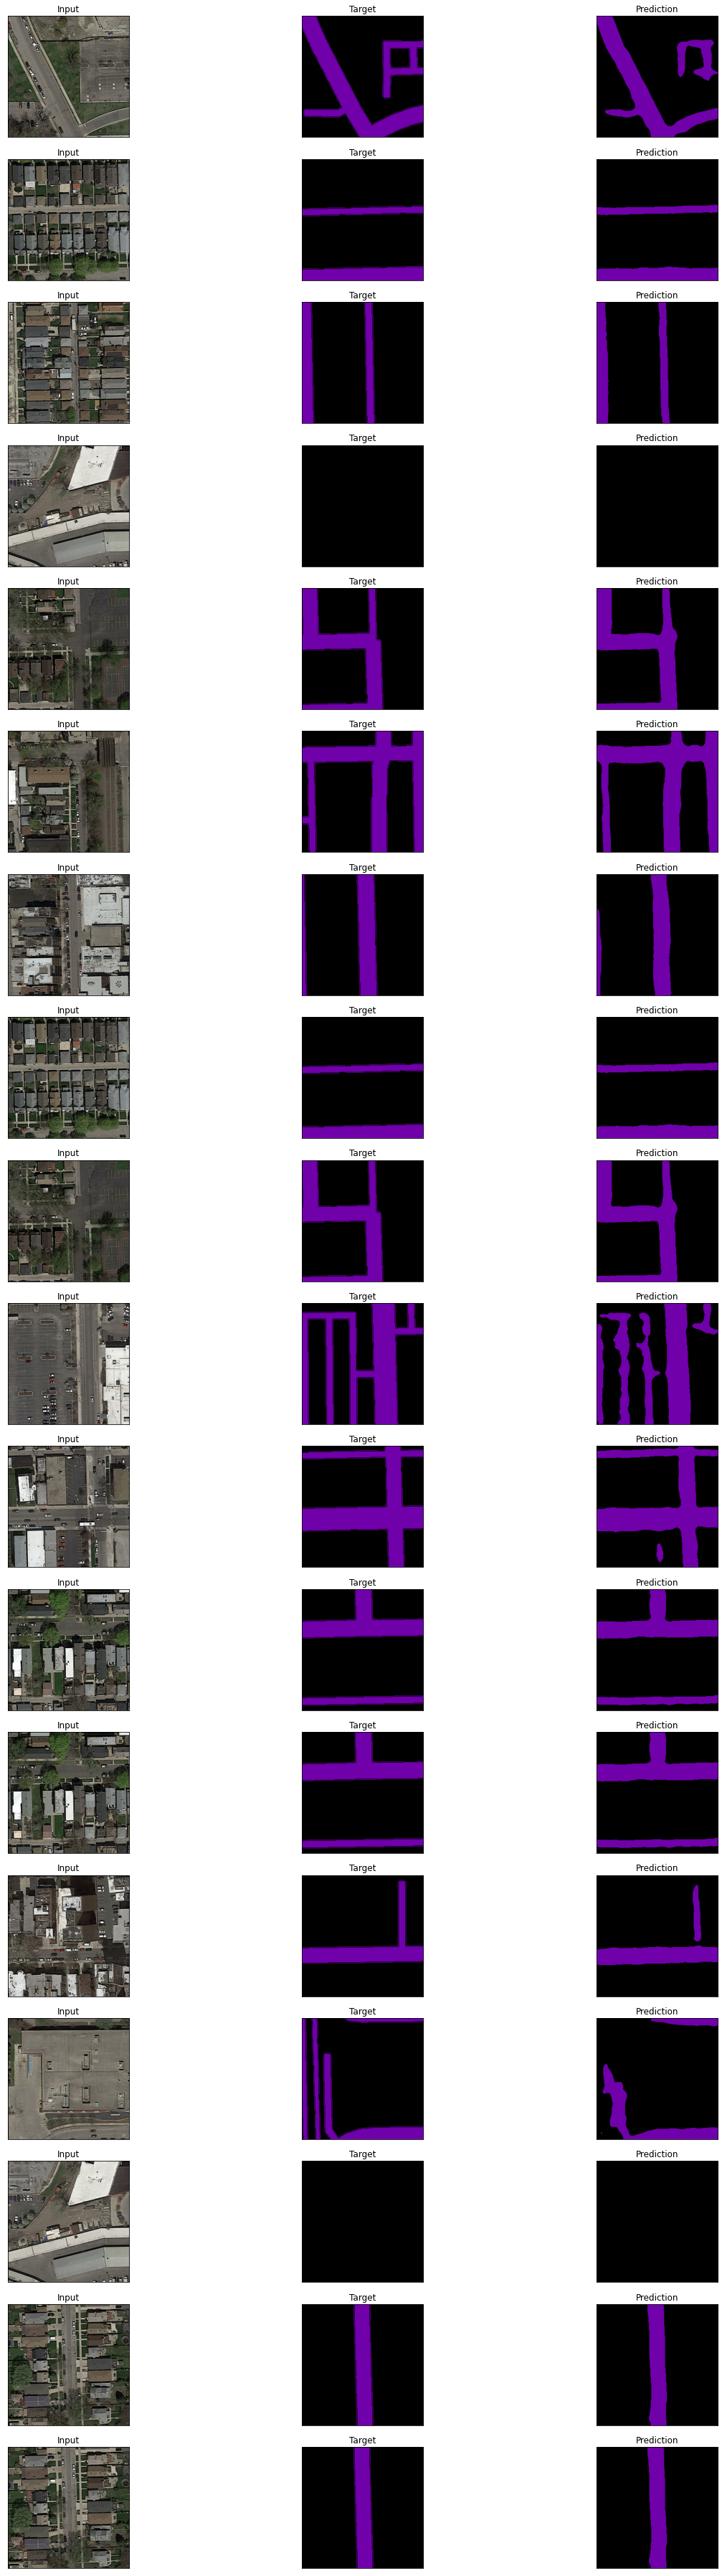

In [ ]:
from deepml.transforms import ImageNetInverseTransform

segmenatation_task.show_predictions(val_loader, image_inverse_transform=ImageNetInverseTransform(), 
                                    samples=18, figsize=(20,50))

You can also check metrics, model predictions, and model graphs on Tensorboard

In [ ]:
# # Enable Tensorboard on colab
# %load_ext tensorboard

# # Run tensorboard and provide model working directory
# %tensorboard --logdir 'unet'

# Prediction on Test data

In [ ]:
test_set_images = os.listdir("test_set_images")
len(test_set_images)

50

In [ ]:
np.array(Image.open(f"test_set_images/{test_set_images[0]}/{test_set_images[0]}.png")).shape

(608, 608, 3)

Create chips from test images, since the input image sizeis (608, 608), our model expects image size (256, 256)

In [ ]:
original_image_size = 608
chip_size = 256
for file in tqdm(test_set_images):
    image = f"./test_set_images/{file}/{file}.png"
    out_dir = f"./test_chips/"
    create_chips(image, None, out_dir, stride=256, window_size=chip_size, geo_tagged=False)

9 chips are create per image, total test images are 50, so total chips = 450

In [ ]:
!rm -r test_chips
test_chips_images = os.listdir("./test_chips/images")
len(test_chips_images)

450

In [ ]:
test_df = pd.DataFrame(test_chips_images, columns=['image'])
test_df.head()

image
0  test_37_2.png
1  test_46_3.png
2  test_21_6.png
3  test_15_6.png
4  test_16_1.png

In [ ]:
test_dataset = SegmentationDataFrameDataset(test_df, image_dir="./test_chips/images", albu_torch_transforms=val_transforms, train=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8)

In [ ]:
segmenatation_task.save_prediction(test_loader, save_dir="test_chips_prediction")

Prediction  :   0%|          | 0/57 [00:00<?, ?it/s]

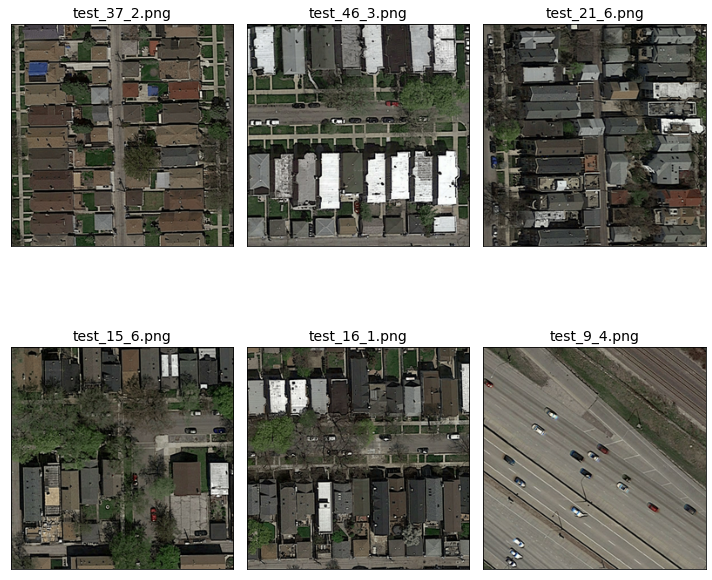

In [ ]:
show_images_from_folder("./test_chips/images", images=test_chips_images[:6])

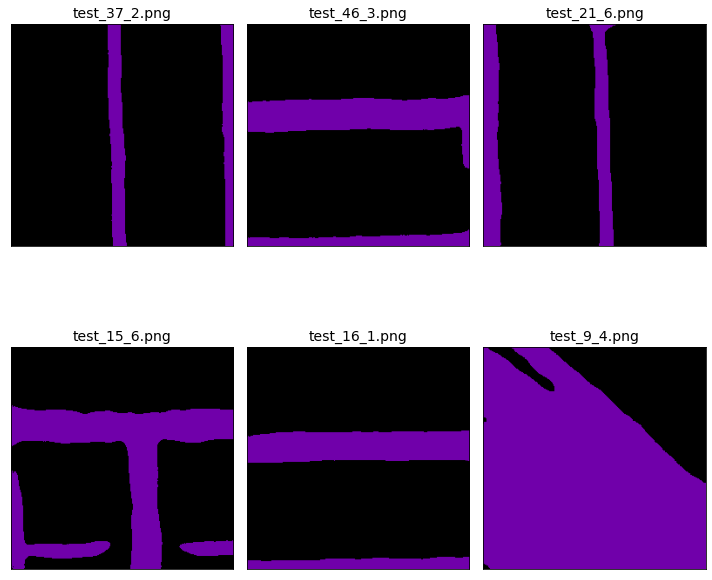

In [ ]:
show_images_from_folder("test_chips_prediction", images=test_chips_images[:6])